In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds-prices/Diamonds Prices2022.csv


# **Import Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# **Analyze Diamond Dataset**

In [3]:
df=pd.read_csv('/kaggle/input/diamonds-prices/Diamonds Prices2022.csv')

In [4]:
df.shape

(53943, 11)

In [5]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [6]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53942,53943,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47


# **Check for Null Values**

In [8]:
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [9]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

# **Drop "Unnamed: 0" column as it represents record number and is of no relevance in our study**

In [10]:
df=df.drop(['Unnamed: 0'],axis=1)

In [11]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# **Check for outliers of columns - [x,y,z,table]**

1. **Records whose Z-Score is beyond 3 are considered outliers**
2. **The outliers can also be viewed using a Box-Whisker Plot**

<AxesSubplot:>

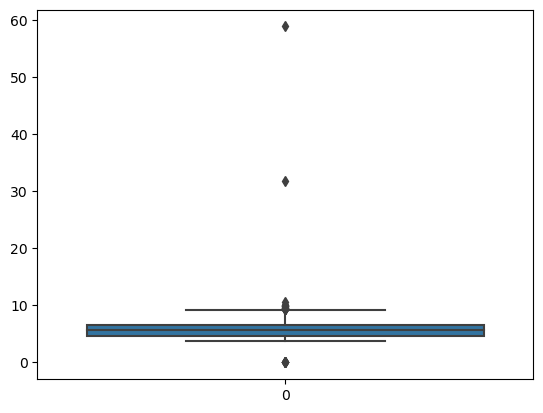

In [14]:
sns.boxplot(df['y'])

In [15]:
z=np.abs(stats.zscore(df.y))
threshold=3
print(len(np.where(z>3)[0]))

34


In [16]:
df=df[(z<3)]

<AxesSubplot:>

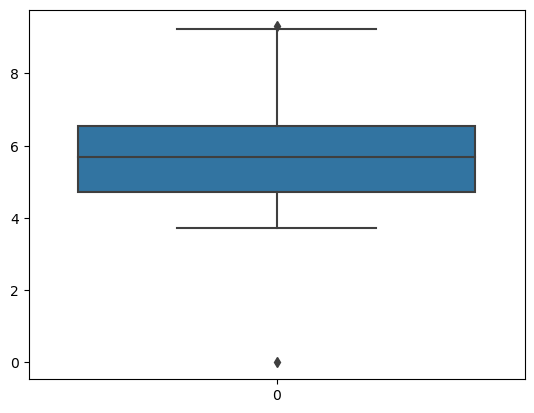

In [17]:
sns.boxplot(df['x'])

In [18]:
z=np.abs(stats.zscore(df.x))
threshold=3
print(len(np.where(z>3)[0]))

11


In [19]:
df=df[(z<3)]

<AxesSubplot:>

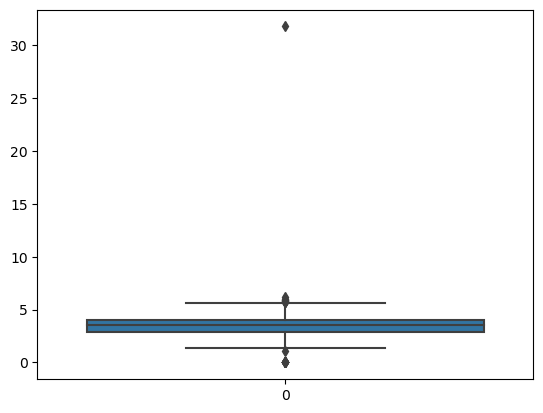

In [20]:
sns.boxplot(df.z)

In [21]:
z=np.abs(stats.zscore(df.z))
threshold=3
print(len(np.where(z>3)[0]))

26


In [22]:
df=df[(z<3)]

<AxesSubplot:>

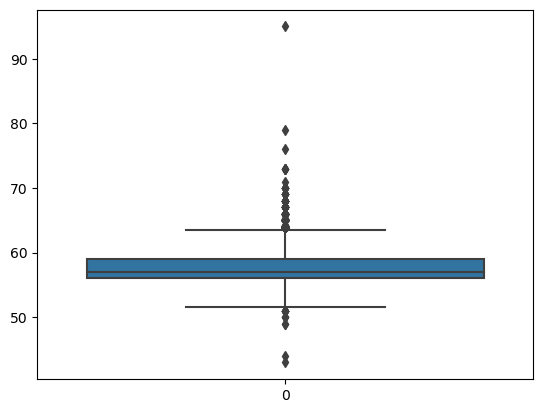

In [23]:
sns.boxplot(df.table)

In [24]:
z=np.abs(stats.zscore(df.table))
threshold=3
print(len(np.where(z>3)[0]))

334


In [25]:
df=df[(z<3)]

<AxesSubplot:>

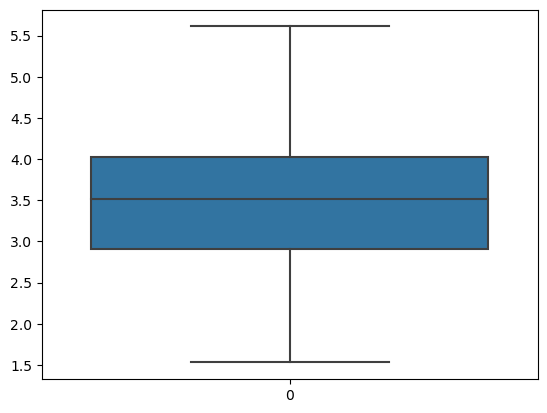

In [26]:
sns.boxplot(df.z)

<AxesSubplot:>

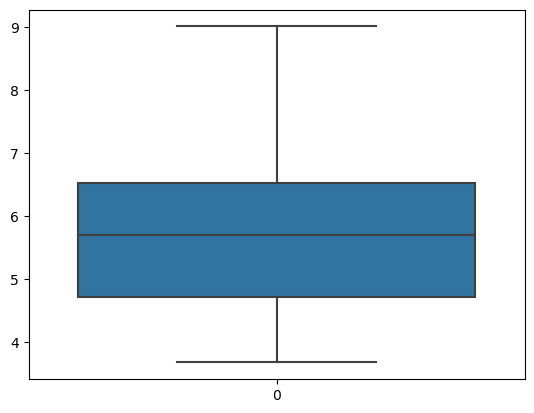

In [27]:
sns.boxplot(df.y)

<AxesSubplot:>

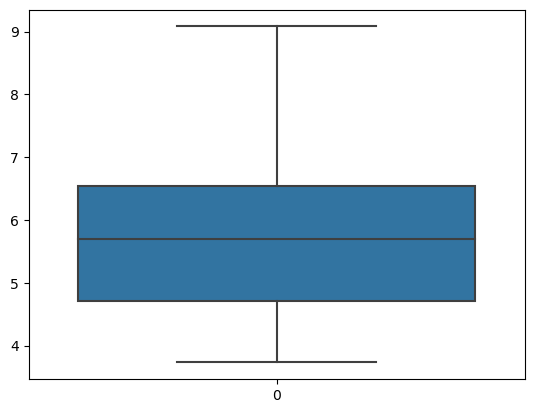

In [28]:
sns.boxplot(df.x)

<AxesSubplot:>

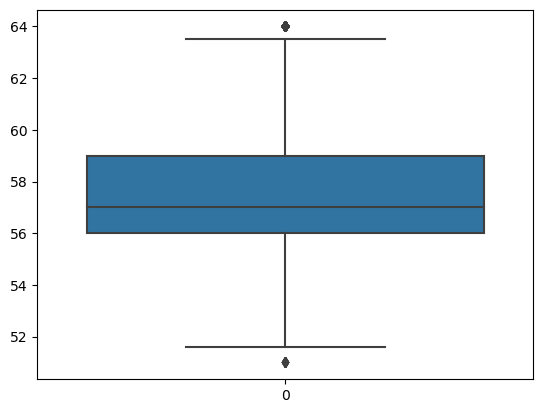

In [29]:
sns.boxplot(df['table'])

# **It can be clearly viewed that the outliers have been removed from the forementioned columns**

In [30]:
for i in df['cut'].unique():
    print(i,'-',df[df['cut']==i]['price'].median())

Ideal - 1809.0
Premium - 3168.5
Good - 3029.5
Very Good - 2649.0
Fair - 3323.0


# **Diamonds with a fair cut have higher price**

# **The median of the prices is chosen for comparison as the median does not get swayed to extremities**

In [31]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

# **Replacing Categorical Values in Cut column using numbers on the basis of their median price**

In [32]:
df['cut'].replace(['Fair','Premium', 'Good', 'Very Good','Ideal'],
                        [5,4,3,2,1], inplace=True)

In [33]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,4,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,1,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,4,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,4,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [34]:
for i in df['clarity'].unique():
    print(i,'-',df[df['clarity']==i]['price'].median())

SI2 - 4072.0
SI1 - 2822.0
VS2 - 2041.0
VVS2 - 1300.0
VVS1 - 1090.5
VS1 - 1996.0
I1 - 3234.0
IF - 1080.0


# **Diamonds with SI2 clarity have a higher price**

In [35]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

# **Replacing Categorical Values in Clarity column using numbers on the basis of their median price**

In [36]:
df['clarity'].replace(['SI2', 'I1','SI1', 'VS2','VS1', 'VVS2', 'VVS1',   'IF'],
                        [8, 7, 6,5,4,3,2,1], inplace=True)

In [37]:
for i in df['color'].unique():
    print(i,'-',df[df['color']==i]['price'].median())

E - 1732.0
I - 3720.0
J - 4224.0
H - 3457.0
F - 2340.0
G - 2232.0
D - 1827.0


# **Diamonds with 'J' color are priced high**

In [38]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

# **Replacing Categorical Values in Color column using numbers on the basis of their median price**

In [39]:
df['color'].replace(['J', 'I', 'H', 'F', 'G', 'D','E'],
                        [7,6,5,4,3,2,1], inplace=True)

In [40]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,1,8,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,1,6,59.8,61.0,326,3.89,3.84,2.31
3,0.29,4,6,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,7,8,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,7,3,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,4,5,8,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,1,2,8,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,4,1,6,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,4,4,6,59.8,62.0,2756,5.74,5.73,3.43


# **Correlation matrix of the dataset as the categorical values have been replaced with numerical values**

Text(0.5, 1.0, 'Correlation Heatmap')

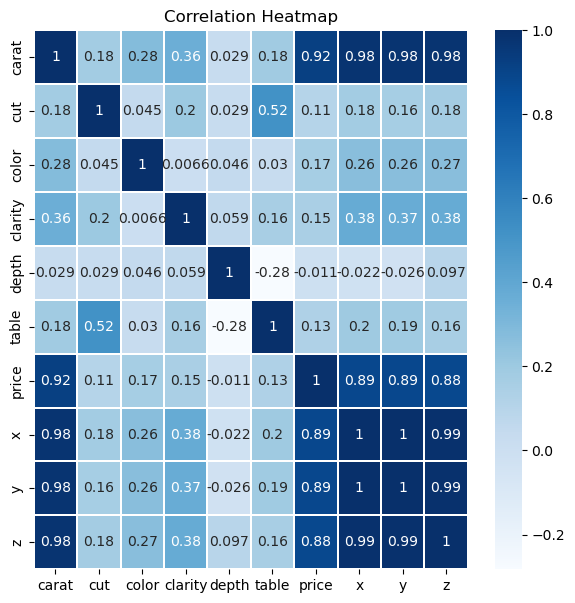

In [41]:
plt.figure(figsize=(7,7));
sns.heatmap(df.corr(),annot=True,cmap='Blues',linewidth=0.1 )
plt.title('Correlation Heatmap',fontsize=12,fontweight=5)

In [42]:
X = df.drop(['price', 'depth'],axis=1)
y=df['price']

In [43]:
from sklearn.model_selection import train_test_split as tts

# **Splitting of dataset into train and test set**

In [44]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=1)

In [45]:
X_train.shape

(42830, 8)

In [46]:
X_test.shape

(10708, 8)

# **Training different regression models on train set**

In [47]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import ElasticNet, Lasso,LinearRegression,RidgeCV
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR

In [48]:
pipelines = {
    'en':make_pipeline(StandardScaler(), ElasticNet()),
    'lasso':make_pipeline(StandardScaler(), Lasso()),
    'Rcv':make_pipeline(StandardScaler(), RidgeCV()),
    'CatB':make_pipeline(StandardScaler(), CatBoostRegressor(eval_metric='RMSE',verbose=1000)),
    'lr':make_pipeline(StandardScaler(), LinearRegression()),
    'rf':make_pipeline(StandardScaler(), RandomForestRegressor()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingRegressor()),
    'dtc':make_pipeline(StandardScaler(),DecisionTreeRegressor()),
    'xg':make_pipeline(StandardScaler(),XGBRegressor()),
    'svr':make_pipeline(StandardScaler(),SVR())
}

In [49]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

Learning rate set to 0.07413
0:	learn: 3728.7045836	total: 66.8ms	remaining: 1m 6s
999:	learn: 435.8224738	total: 5s	remaining: 0us


# **Evaluation of trained models on test set**

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
maes=[]
al=[]
rmse=[]
r2=[]
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    al.append(algo)
    maes.append(mean_absolute_error(y_test,yhat))
    r2.append(r2_score(y_test,yhat))
    rmse.append(mean_squared_error(y_test,yhat)**(0.5))
    print(algo,'MEAN ABSOLUTE ERROR - ', mean_absolute_error(y_test,yhat))
    print(algo,'ROOT MEAN SQUARED ERROR - ',mean_squared_error(y_test,yhat)**(0.5))
    print(algo,'R2 Score - ',r2_score(y_test,yhat))

en MEAN ABSOLUTE ERROR -  1075.1101346142632
en ROOT MEAN SQUARED ERROR -  1566.3036782067459
en R2 Score -  0.8393871863377724
lasso MEAN ABSOLUTE ERROR -  776.0715783163251
lasso ROOT MEAN SQUARED ERROR -  1170.2838831408462
lasso R2 Score -  0.9103375291161365
Rcv MEAN ABSOLUTE ERROR -  777.1371190315069
Rcv ROOT MEAN SQUARED ERROR -  1169.304777595163
Rcv R2 Score -  0.9104874966579799
CatB MEAN ABSOLUTE ERROR -  260.8440706657478
CatB ROOT MEAN SQUARED ERROR -  496.0578301844038
CatB R2 Score -  0.9838900989381317
lr MEAN ABSOLUTE ERROR -  777.1651800110392
lr ROOT MEAN SQUARED ERROR -  1169.2981007653002
lr R2 Score -  0.910488518903096
rf MEAN ABSOLUTE ERROR -  260.5066993684443
rf ROOT MEAN SQUARED ERROR -  509.37145138463643
rf R2 Score -  0.9830137521886773
gb MEAN ABSOLUTE ERROR -  348.89971920237446
gb ROOT MEAN SQUARED ERROR -  618.0223784675304
gb R2 Score -  0.9749944358650103
dtc MEAN ABSOLUTE ERROR -  347.98757937990285
dtc ROOT MEAN SQUARED ERROR -  698.2168585846943


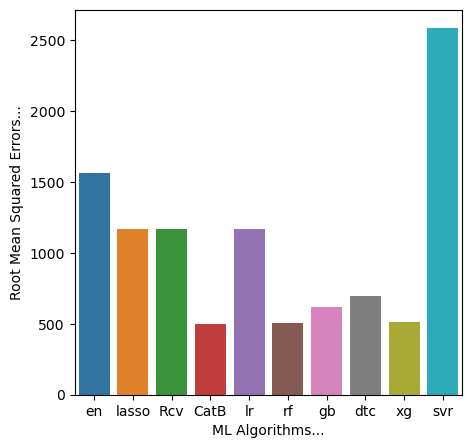

In [51]:
plt.figure(figsize=(5,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Root Mean Squared Errors...')
ax=sns.barplot(x=al,y=rmse)
plt.show()

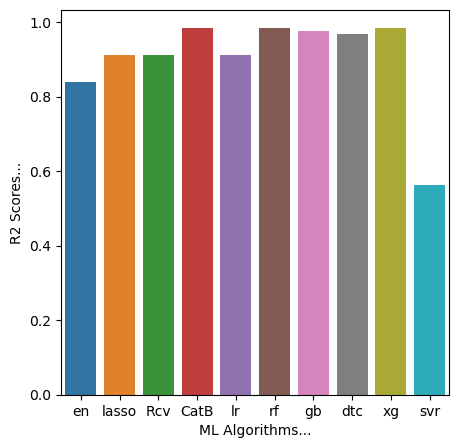

In [52]:
plt.figure(figsize=(5,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('R2 Scores...')
ax=sns.barplot(x=al,y=r2)
plt.show()

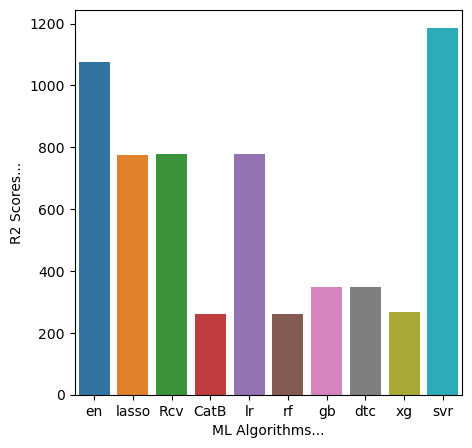

In [55]:
plt.figure(figsize=(5,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('R2 Scores...')
ax=sns.barplot(x=al,y=maes)
plt.show()

# **It can be observed that** 
# 1. CatBoostRegressor
# 2. RandomForestRegressor 
# 3. XGBoostRegressor 
# **perform well on the test set as evaluated from r2 score, rmse and mae**

***Stacked Regressor created using CatBoostRegreesor, XGBoostRegressor and RandomForestRegressor at Level 0 and Linear Regression at Level 1***

In [56]:
CatB = CatBoostRegressor(verbose=1000,eval_metric='RMSE')
rf = RandomForestRegressor()
#gb = GradientBoostingRegressor()
xg = XGBRegressor()
lr=LinearRegression()

stregr = StackingRegressor(estimators=[('catb',CatB),('xg', xg),('rf',rf)],
                           final_estimator=lr)

pipeline = make_pipeline(
    StandardScaler(),
    stregr
)
pipeline.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Root Mean Squared Error: %.4f" % mean_squared_error(y_test,y_pred)**0.5)

Learning rate set to 0.07413
0:	learn: 3728.7045836	total: 7.45ms	remaining: 7.44s
999:	learn: 435.8224738	total: 5.02s	remaining: 0us
Learning rate set to 0.071562
0:	learn: 3750.5791029	total: 5.83ms	remaining: 5.83s
999:	learn: 431.6812744	total: 4.03s	remaining: 0us
Learning rate set to 0.071562
0:	learn: 3751.3546301	total: 5.83ms	remaining: 5.82s
999:	learn: 427.0560049	total: 3.89s	remaining: 0us
Learning rate set to 0.071562
0:	learn: 3720.0619341	total: 5.49ms	remaining: 5.48s
999:	learn: 422.2001779	total: 3.96s	remaining: 0us
Learning rate set to 0.071562
0:	learn: 3747.1599857	total: 5.38ms	remaining: 5.37s
999:	learn: 424.5500365	total: 4.36s	remaining: 0us
Learning rate set to 0.071562
0:	learn: 3727.1645712	total: 5.86ms	remaining: 5.85s
999:	learn: 427.3746001	total: 3.94s	remaining: 0us
Root Mean Squared Error: 484.8049


In [57]:
al.append('stacked model')
rmse.append(mean_squared_error(y_test,y_pred)**0.5)
r2.append(r2_score(y_test,y_pred))
maes.append(mean_absolute_error(y_test,y_pred))

In [58]:
for i in range(len(rmse)):
    print("The RMSE of",al[i],'is',rmse[i])

The RMSE of en is 1566.3036782067459
The RMSE of lasso is 1170.2838831408462
The RMSE of Rcv is 1169.304777595163
The RMSE of CatB is 496.0578301844038
The RMSE of lr is 1169.2981007653002
The RMSE of rf is 509.37145138463643
The RMSE of gb is 618.0223784675304
The RMSE of dtc is 698.2168585846943
The RMSE of xg is 510.0415418948058
The RMSE of svr is 2586.891218266113
The RMSE of stacked model is 484.8048969216186


In [59]:
for i in range(len(r2)):
    print("The R2 Score of",al[i],'is',r2[i])

The R2 Score of en is 0.8393871863377724
The R2 Score of lasso is 0.9103375291161365
The R2 Score of Rcv is 0.9104874966579799
The R2 Score of CatB is 0.9838900989381317
The R2 Score of lr is 0.910488518903096
The R2 Score of rf is 0.9830137521886773
The R2 Score of gb is 0.9749944358650103
The R2 Score of dtc is 0.968083966215282
The R2 Score of xg is 0.9829690311494741
The R2 Score of svr is 0.561888566006813
The R2 Score of stacked model is 0.9846127060465693


In [60]:
al.remove('svr')

In [61]:
rmse.remove(rmse[9])
maes.remove(maes[9])
r2.remove(r2[9])

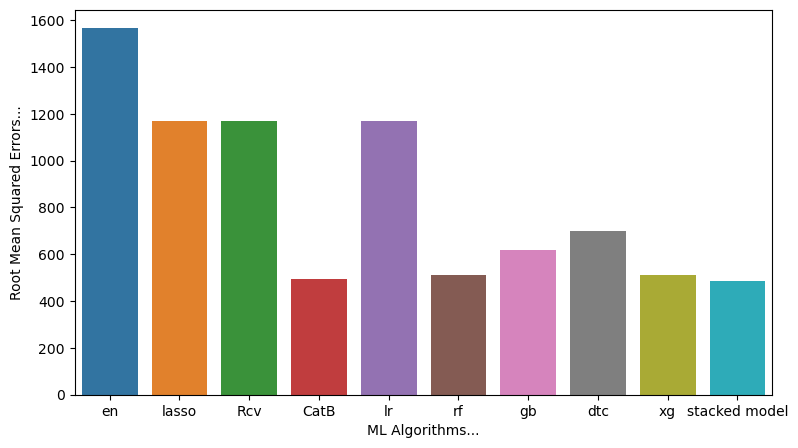

In [62]:
plt.figure(figsize=(9,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Root Mean Squared Errors...')
ax=sns.barplot(x=al,y=rmse)
plt.show()

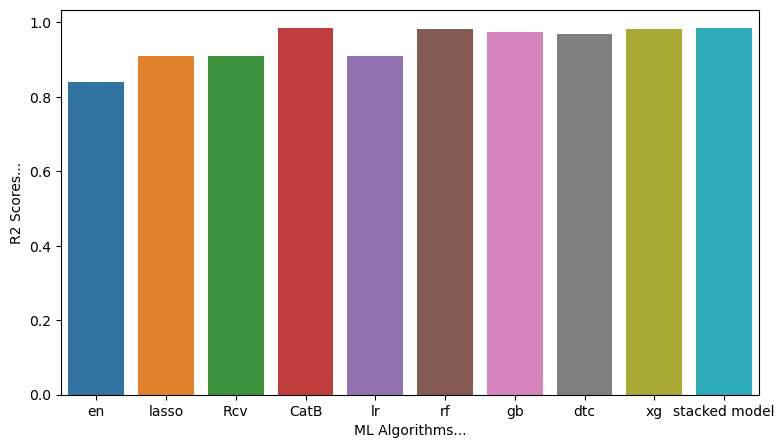

In [63]:
plt.figure(figsize=(9,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('R2 Scores...')
ax=sns.barplot(x=al,y=r2)
plt.show()

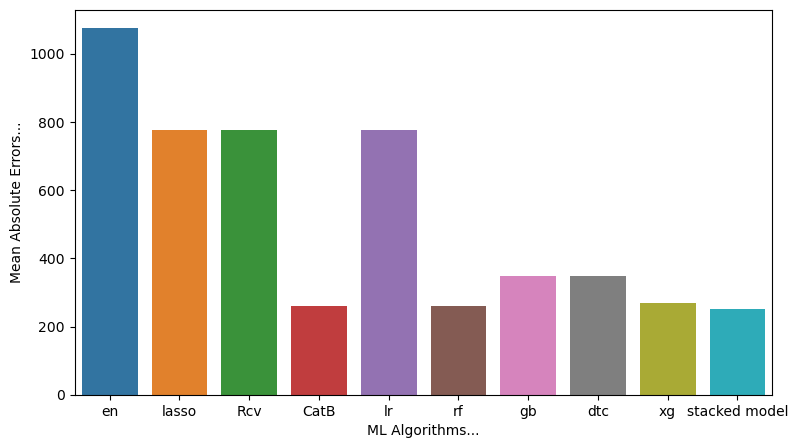

In [64]:
plt.figure(figsize=(9,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Mean Absolute Errors...')
ax=sns.barplot(x=al,y=maes)
plt.show()

# **It can be seen that the stacked model works better on the dataset as compared to the rest of the standalone models**

# *Do Upvote the notebook if you enjoyed!!!*